In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
data = pd.read_csv('ONGC.csv', index_col='Date')
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,ONGC,EQ,207.70,205.0,214.4,205.0,214.0,213.45,209.91,9600,2.015090e+11,NaN,NaN,NaN
2000-01-04,ONGC,EQ,213.45,201.5,209.7,201.0,209.0,206.55,206.26,17900,3.692030e+11,NaN,NaN,NaN
2000-01-05,ONGC,EQ,206.55,201.0,223.1,200.5,223.1,223.10,215.46,27000,5.817490e+11,NaN,NaN,NaN
2000-01-06,ONGC,EQ,223.10,234.0,234.9,217.6,217.6,219.30,223.42,35600,7.953680e+11,NaN,NaN,NaN
2000-01-07,ONGC,EQ,219.30,223.0,223.0,213.0,215.7,215.75,215.19,11400,2.453145e+11,NaN,NaN,NaN


In [4]:
len(data)

5306

In [5]:
data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-04-26,ONGC,EQ,102.40,105.25,105.7,102.50,102.80,102.80,103.86,11797791,1.225355e+14,63132.0,3024740.0,0.2564
2021-04-27,ONGC,EQ,102.80,102.80,104.0,102.80,103.30,103.20,103.42,8886250,9.189768e+13,46923.0,3802836.0,0.4279
2021-04-28,ONGC,EQ,103.20,103.75,104.4,103.30,104.05,103.90,103.90,6887787,7.156081e+13,33659.0,2533669.0,0.3678
2021-04-29,ONGC,EQ,103.90,104.90,105.9,103.55,104.30,104.05,104.39,14990087,1.564876e+14,54416.0,4613745.0,0.3078
2021-04-30,ONGC,EQ,104.05,104.15,112.7,103.30,108.20,108.15,109.79,81358264,8.932632e+14,248419.0,15306987.0,0.1881


In [7]:
data.fillna(method='ffill', inplace=True)

/tmp/ipykernel_71590/2866031220.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [8]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     498
%Deliverble            498
dtype: int64

In [9]:
#including date from index
data['date'] = data.index

# # Calculate 10/20/30-day Moving Average
# stock_data['10_MA'] = stock_data['Close'].rolling(window=10).mean()
# stock_data['20_MA'] = stock_data['Close'].rolling(window=20).mean()
# stock_data['30_MA'] = stock_data['Close'].rolling(window=30).mean()



# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window):
    diff = data.diff(1).dropna()
    gain = (diff.where(diff > 0, 0)).rolling(window=window).mean()
    loss = (-diff.where(diff < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data['Close'], window=14)

In [10]:
data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,date,RSI
Date,,,,,,,,,,,,,,,,
2000-01-03,ONGC,EQ,207.70,205.00,214.4,205.00,214.00,213.45,209.91,9600,2.015090e+11,NaN,NaN,NaN,2000-01-03,NaN
2000-01-04,ONGC,EQ,213.45,201.50,209.7,201.00,209.00,206.55,206.26,17900,3.692030e+11,NaN,NaN,NaN,2000-01-04,NaN
2000-01-05,ONGC,EQ,206.55,201.00,223.1,200.50,223.10,223.10,215.46,27000,5.817490e+11,NaN,NaN,NaN,2000-01-05,NaN
2000-01-06,ONGC,EQ,223.10,234.00,234.9,217.60,217.60,219.30,223.42,35600,7.953680e+11,NaN,NaN,NaN,2000-01-06,NaN
2000-01-07,ONGC,EQ,219.30,223.00,223.0,213.00,215.70,215.75,215.19,11400,2.453145e+11,NaN,NaN,NaN,2000-01-07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,ONGC,EQ,102.40,105.25,105.7,102.50,102.80,102.80,103.86,11797791,1.225355e+14,63132.0,3024740.0,0.2564,2021-04-26,46.790890
2021-04-27,ONGC,EQ,102.80,102.80,104.0,102.80,103.30,103.20,103.42,8886250,9.189768e+13,46923.0,3802836.0,0.4279,2021-04-27,49.471459
2021-04-28,ONGC,EQ,103.20,103.75,104.4,103.30,104.05,103.90,103.90,6887787,7.156081e+13,33659.0,2533669.0,0.3678,2021-04-28,49.895178


Text(0, 0.5, 'Normalized Price')

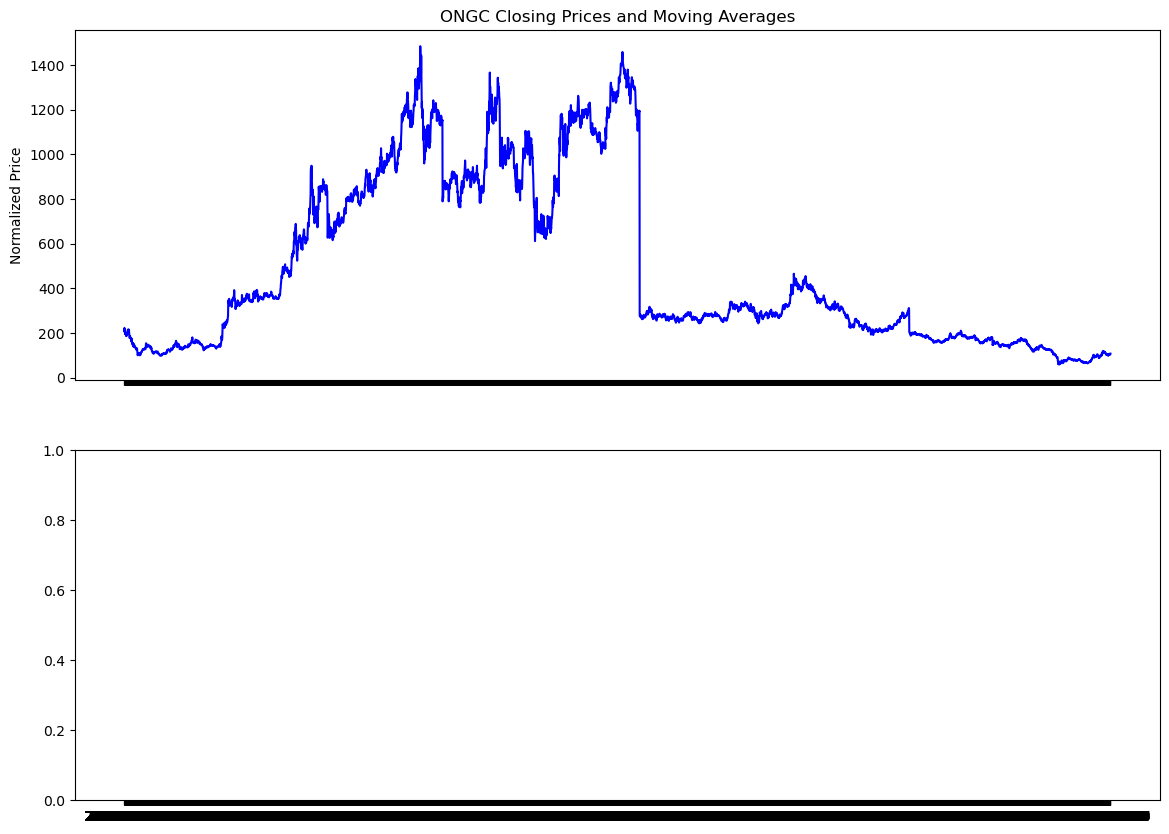

In [11]:
# Plot closing price and moving average
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot Closing Prices, High, Low, and 20-Day Moving Average
ax1.plot(data['Close'], label='Close Price', color='blue')
ax1.set_title('ONGC Closing Prices and Moving Averages')
ax1.set_ylabel('Normalized Price')

In [12]:
data.index = pd.to_datetime(data.index)

/home/aaryan13/.local/lib/python3.10/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


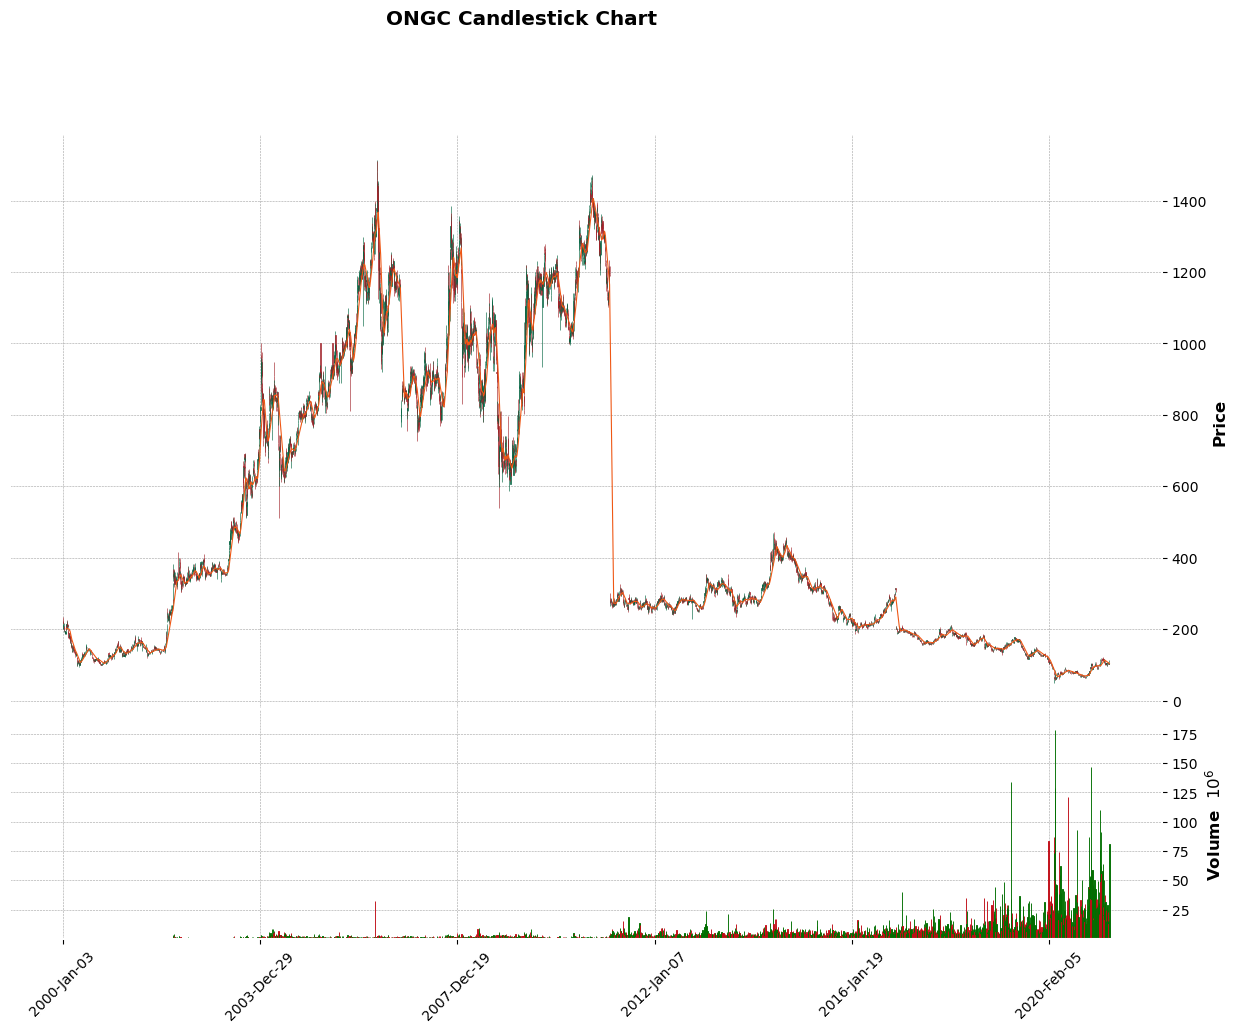

In [13]:
import mplfinance as mpf

mpf.plot(data, type='candle', style='charles', title='ONGC Candlestick Chart',
         ylabel='Price', volume=True, mav=(20), figscale=2)

In [14]:
data['Daily_Return'] = data['Close'].pct_change()

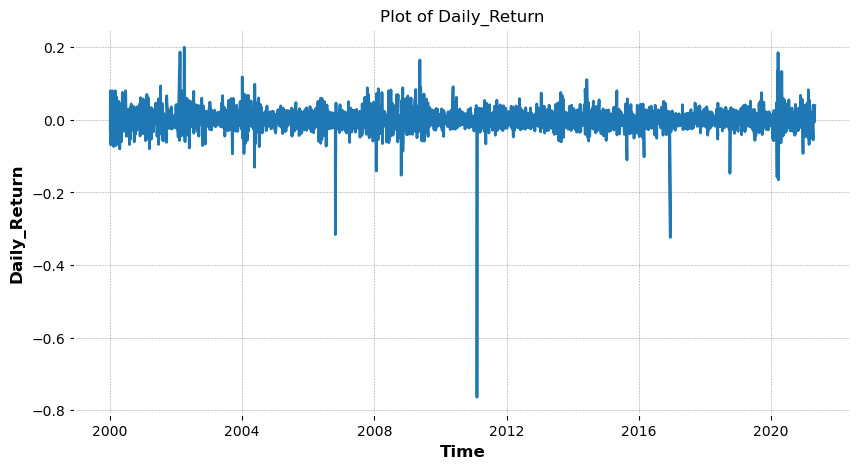

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(data['Daily_Return'])
plt.title(f"Plot of {'Daily_Return'}")
plt.xlabel('Time')
plt.ylabel('Daily_Return')
plt.grid(True)
plt.show()

In [16]:
closing = data.filter(['Close']).values

In [17]:
closing

array([[213.45],
       [206.55],
       [223.1 ],
       ...,
       [103.9 ],
       [104.05],
       [108.15]])

In [76]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(closing)


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [19]:
normalized_data.shape

(5306, 1)

In [20]:
training_data_len = int(np.ceil( len(normalized_data) * .85 ))
training_data_len

4511

In [21]:
train_data=normalized_data[0:int(training_data_len)]

In [22]:
train_data.size

4511

In [24]:
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.1077447 , 0.10289987, 0.11452043, 0.11185227, 0.10935964,
       0.10497121, 0.09486027, 0.09984553, 0.09749333, 0.09436877,
       0.09479006, 0.08875158, 0.09278893, 0.09296447, 0.09180593,
       0.09257829, 0.09078781, 0.10142536, 0.1020924 , 0.10511164,
       0.10890324, 0.10858728, 0.10511164, 0.1067968 , 0.10988625,
       0.10518186, 0.10725319, 0.10293498, 0.09229743, 0.09089313,
       0.08278332, 0.08864626, 0.08892712, 0.08653981, 0.08376632,
       0.08095773, 0.08074709, 0.07850021, 0.07256706, 0.0817652 ,
       0.07530543, 0.07899171, 0.07039039, 0.06691476, 0.06831906,
       0.06357955, 0.06136779, 0.06600197, 0.05947198, 0.05652296,
       0.05898048, 0.06533492, 0.06224547, 0.05518888, 0.05873473,
       0.05862941, 0.05992838, 0.05568038, 0.05462716, 0.05424098])]
[0.05301221738519871]

[array([0.1077447 , 0.10289987, 0.11452043, 0.11185227, 0.10935964,
       0.10497121, 0.09486027, 0.09984553, 0.09749333, 0.09436877,
       0.09479006, 0.08875158, 0.09

In [25]:
x_train.shape

(4451, 60, 1)

In [26]:
y_train.shape

(4451,)

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

2024-07-09 00:38:08.667887: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-09 00:38:08.671568: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-09 00:38:08.883555: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-09 00:38:09.637820: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-09 00:38:11.348736: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [28]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=15, epochs=50)

/home/aaryan13/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 28s 87ms/step - loss: 0.0064
Epoch 2/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 26s 88ms/step - loss: 7.2622e-04
Epoch 3/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 31s 104ms/step - loss: 5.7532e-04
Epoch 4/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 29s 96ms/step - loss: 4.1259e-04
Epoch 5/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 28s 94ms/step - loss: 6.3447e-04
Epoch 6/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 30s 102ms/step - loss: 4.5531e-04
Epoch 7/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 28s 96ms/step - loss: 2.8271e-04
Epoch 8/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 27s 90ms/step - loss: 2.7989e-04
Epoch 9/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 27s 93ms/step - loss: 6.2648e-04
Epoch 10/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 26s 86ms/step - loss: 5.5654e-04
Epoch 11/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 25s 86ms/step - loss: 4.9489e-04
Epoch 12/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 25s 83ms/step - loss: 1.7123e-04
Epoch 13/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 28s 93ms/step - loss: 2.4656e-04
Epoch 14/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms

In [29]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = normalized_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = normalized_data[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f"RMSE: {rmse}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
RMSE: 137.15650022624925


In [40]:
print(predictions.shape)

(795, 1)


In [41]:
fy = np.reshape(predictions, (predictions.shape[0],))

In [42]:
print(fy.shape)

(795,)


In [58]:
data.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2021-04-16', '2021-04-19', '2021-04-20', '2021-04-22',
               '2021-04-23', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30'],
              dtype='datetime64[ns]', name='Date', length=5306, freq=None)

In [59]:
valid.index

DatetimeIndex(['2018-02-09', '2018-02-12', '2018-02-14', '2018-02-15',
               '2018-02-16', '2018-02-19', '2018-02-20', '2018-02-21',
               '2018-02-22', '2018-02-23',
               ...
               '2021-04-16', '2021-04-19', '2021-04-20', '2021-04-22',
               '2021-04-23', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30'],
              dtype='datetime64[ns]', name='Date', length=795, freq=None)

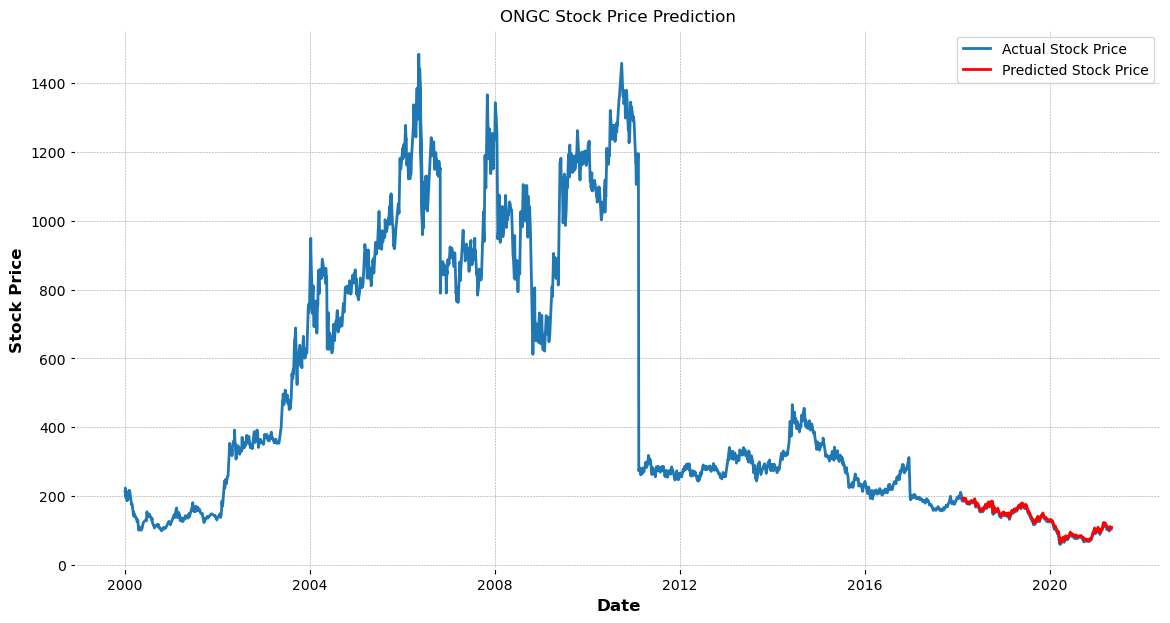

In [60]:
valid = data[training_data_len:].copy()
valid['Predictions'] = fy

plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Actual Stock Price')
plt.plot(valid.index.values, valid['Predictions'].values, label='Predicted Stock Price', color='red')
plt.title('ONGC Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()